<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
print(df.describe())
print(df.shape)

         Respondent     CompTotal  ConvertedComp   WorkWeekHrs   CodeRevHrs  \
count  11398.000000  1.058900e+04   1.058200e+04  11276.000000  8972.000000   
mean   12490.392437  7.570477e+05   1.315967e+05     42.064606     4.781071   
std     7235.461999  9.705598e+06   2.947865e+05     24.672741     4.567060   
min        4.000000  0.000000e+00   0.000000e+00      3.000000     0.000000   
25%     6264.250000  2.500000e+04   2.686800e+04     40.000000     2.000000   
50%    12484.000000  6.500000e+04   5.774500e+04     40.000000     4.000000   
75%    18784.750000  1.200000e+05   1.000000e+05     43.000000     5.000000   
max    25142.000000  7.000000e+08   2.000000e+06   1012.000000    99.000000   

                Age  
count  11111.000000  
mean      30.778895  
std        7.393686  
min       16.000000  
25%       25.000000  
50%       29.000000  
75%       35.000000  
max       99.000000  
(11398, 85)


In [4]:
df.duplicated().any()

False

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Axes: ylabel='Density'>

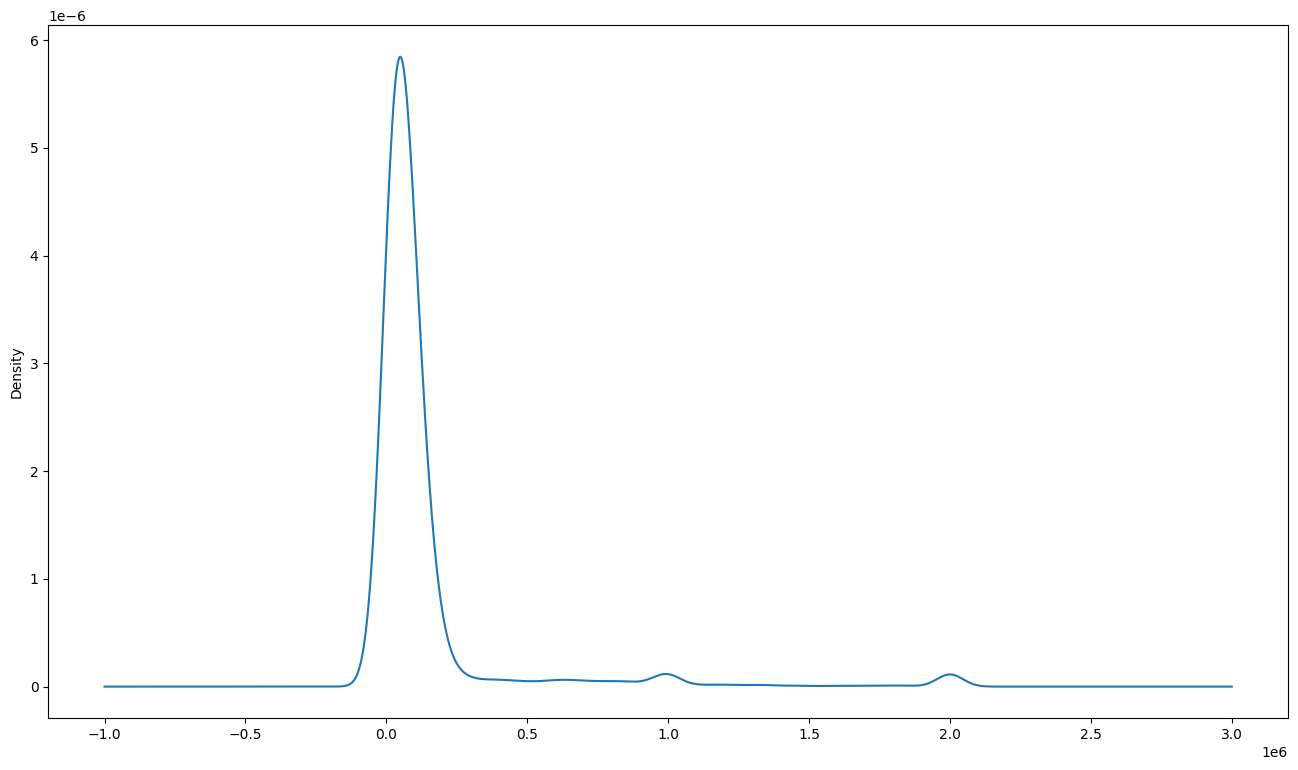

In [5]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
fig,ax = plt.subplots(figsize = (16,9))
df['ConvertedComp'].plot(ax=ax, kind='density')

Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

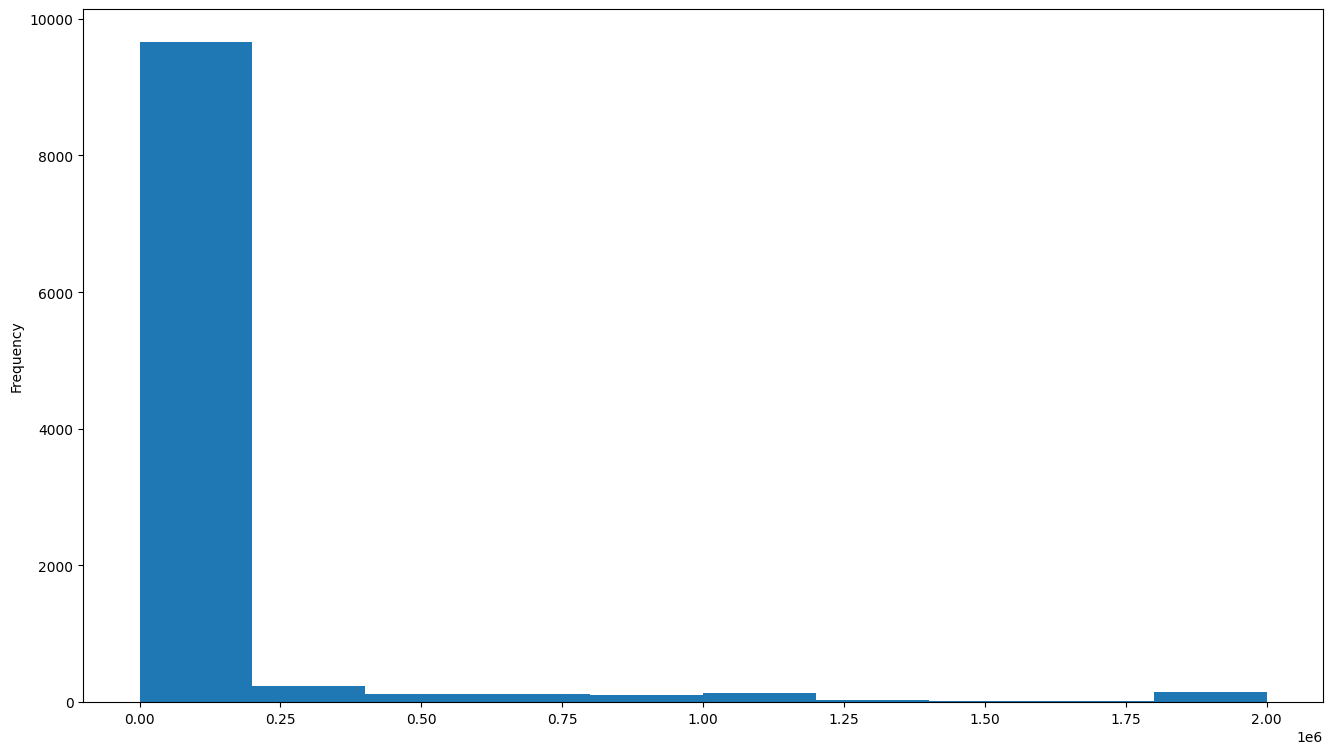

In [6]:
# your code goes here
%matplotlib inline
fig,ax = plt.subplots(figsize = (16,9))
df['ConvertedComp'].plot(ax=ax, kind='hist')

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
df[df['Gender'] == 'Man'].shape

(10480, 85)

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here
df.loc[(df['Gender'] == 'Woman'),'ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [18]:
# your code goes here

df.dropna(subset=['ConvertedComp'], inplace= True)

df['Age'].fillna(df['Age'].median(), inplace= True)
quartiles = np.percentile(df['Age'], [25, 50, 75])
print('Min: ', df['Age'].min())
print('Q1: ',quartiles[0])
print('Median: ', quartiles[1])
print('Q3: ', quartiles[2])
print('Max: ', df['Age'].max())

Min:  16.0
Q1:  26.0
Median:  29.0
Q3:  34.0
Max:  99.0


Plot a histogram of the column `Age`.


<Axes: ylabel='Frequency'>

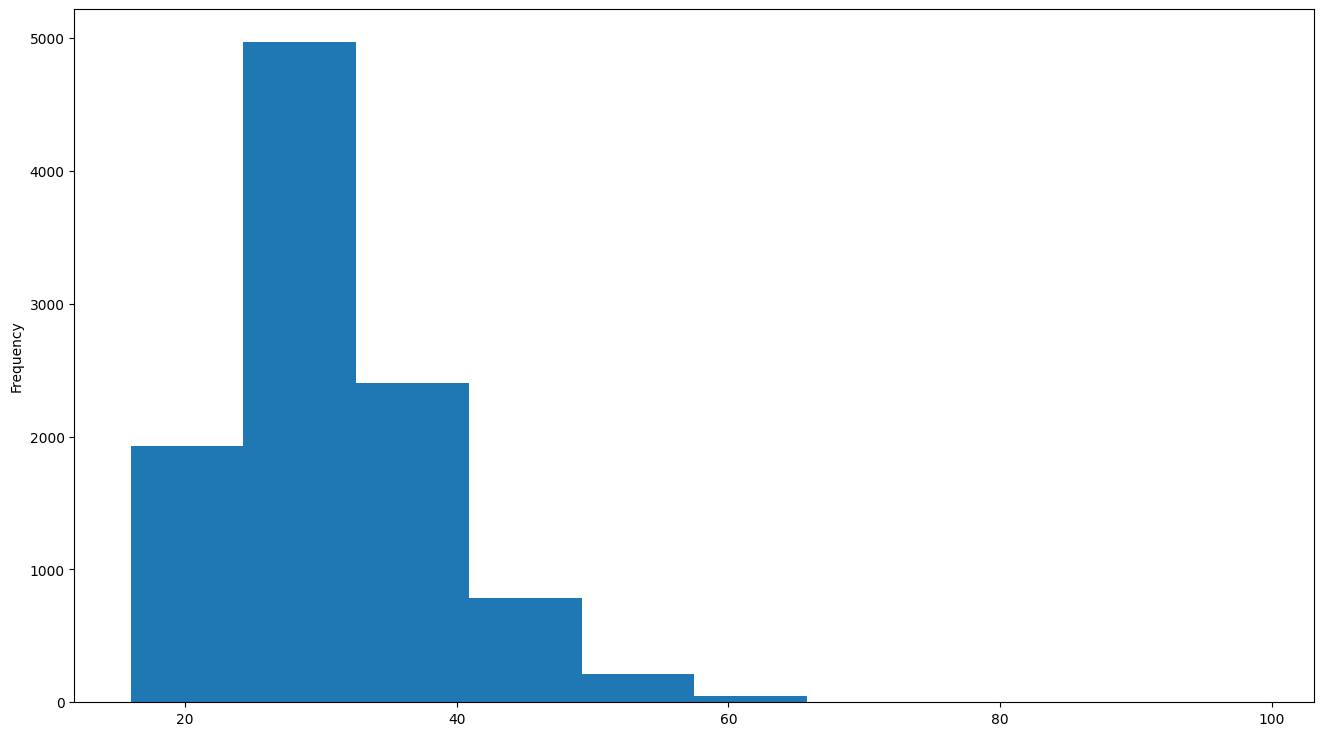

In [11]:
# your code goes here
%matplotlib inline
fig,ax = plt.subplots(figsize = (16,9))
df['Age'].plot(ax=ax, kind='hist')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: >

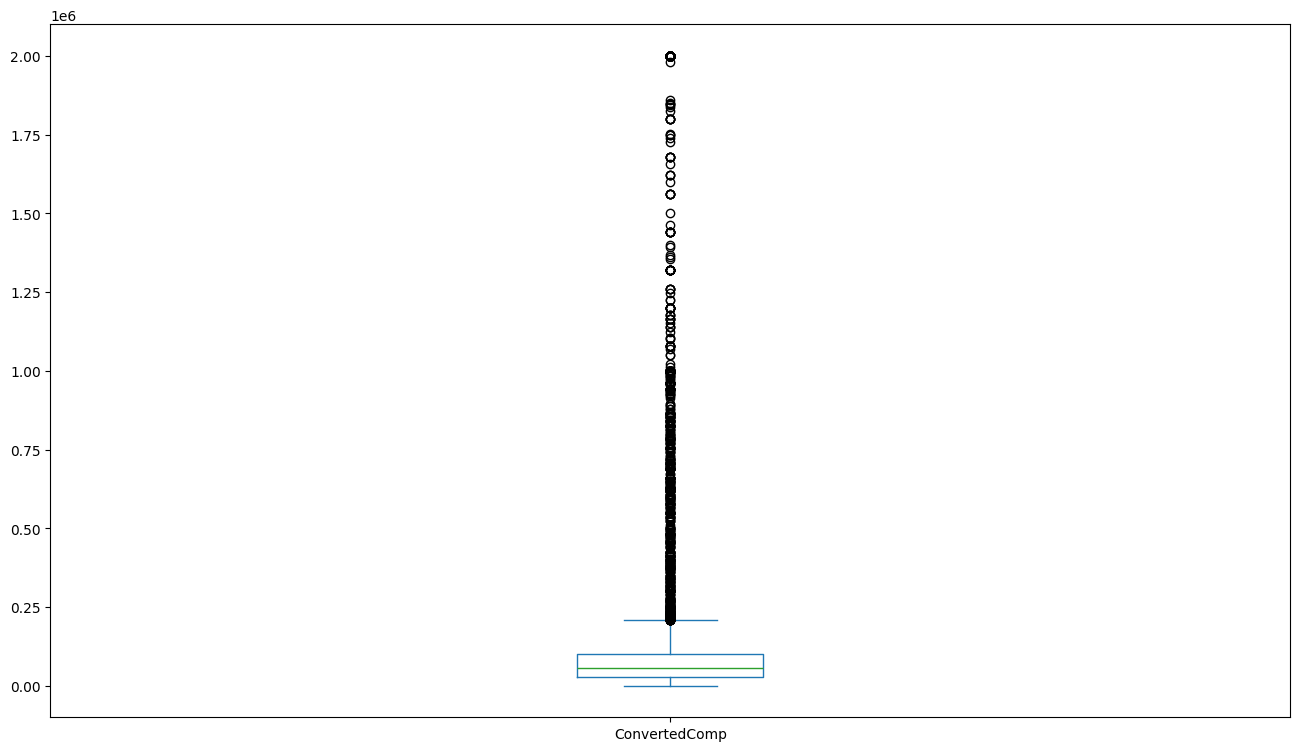

In [12]:
# your code goes here

fig,ax = plt.subplots(figsize = (16,9))
df['ConvertedComp'].plot(kind='box')


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
quartiles = np.percentile(df['ConvertedComp'],[25,50,75])
print(quartiles)
inter_quartile_range = quartiles[2] - quartiles[0]
print(inter_quartile_range)

[ 26868.  57745. 100000.]
73132.0


Find out the upper and lower bounds.


In [14]:
# your code goes here
lower_bound = quartiles[0] - 1.5 * inter_quartile_range
upper_bound = quartiles[2] + 1.5 * inter_quartile_range
print(lower_bound,upper_bound)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [15]:
# your code goes here
df.loc[(df['ConvertedComp'] > upper_bound), 'ConvertedComp'].count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
# your code goes here
df_new = df[~((df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound))]

df_new['ConvertedComp'].median()
df_new['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [17]:
# your code goes here
df[['Age','CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs']].corr()

,Age,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs
Age,1.000000,0.006949,0.105386,0.031592,-0.015742
CompTotal,0.006949,1.000000,0.001037,0.003467,0.006698
ConvertedComp,0.105386,0.001037,1.000000,0.021143,-0.033865
WorkWeekHrs,0.031592,0.003467,0.021143,1.000000,0.032463
CodeRevHrs,-0.015742,0.006698,-0.033865,0.032463,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
